In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('data/bank-additional-full.csv',sep=';')
df.shape

(41188, 21)

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [42]:
X = df.drop(columns='y',axis=1)
X.columns, X.shape

(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'),
 (41188, 20))

In [43]:
Y = df['y'].map({'yes':1, 'no':0})
Y.shape

(41188,)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [50]:
X_train.shape

(28831, 20)

In [51]:
X_test.shape

(12357, 20)

In [52]:
num_features = X_train.select_dtypes(exclude='object').columns.tolist()
cat_features = X_train.select_dtypes(include='object').columns.tolist()
print("Numerical features: ",num_features)
print("Categorical features: ",cat_features)

Numerical features:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

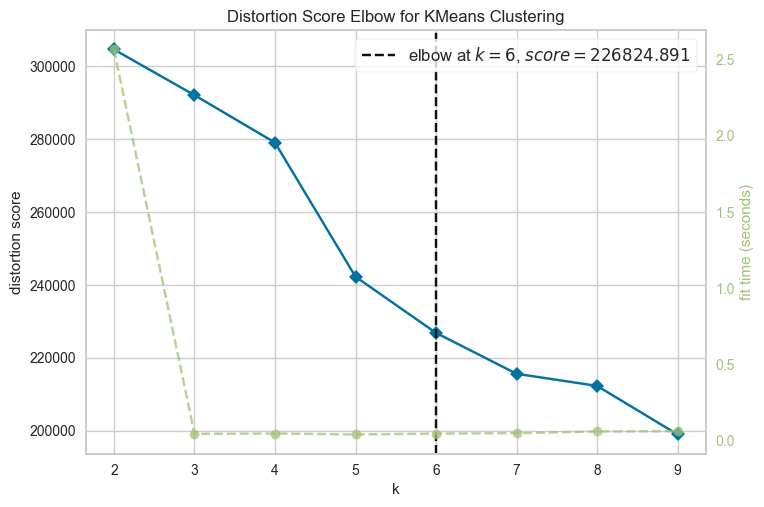

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k = (2,10))

visualizer.fit(X_train)
visualizer.show()

In [57]:
X_train.shape

(28831, 53)

In [59]:
km = KMeans(n_clusters=6, init='k-means++',n_init=10, max_iter=100, random_state=42)
clusters = km.fit_predict(X=X_train)

In [ ]:
clusters

array([1, 3, 0, ..., 4, 0, 5], shape=(28831,), dtype=int32)

In [85]:
X_clustered = pd.DataFrame(X_train)
X_clustered['clusters'] = clusters

In [86]:
X_clustered.shape

(28831, 54)

In [87]:
print("Number of Records per Cluster:")
print(X_clustered['clusters'].value_counts().sort_index())

Number of Records per Cluster:
clusters
0    11074
1     1867
2     1092
3     6553
4     1051
5     7194
Name: count, dtype: int64


In [82]:
X_clustered


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,clusters
0,-1.053709,-0.695116,0.154139,0.193350,1.673800,-1.962634,-1.490923,1.621455,-1.678565,-1.978346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.053709,-0.944916,0.517478,0.193350,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0.477399,0.073498,-0.209199,0.193350,-0.349144,0.647250,0.718902,0.887871,0.713705,0.330682,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.575238,-0.722018,-0.572537,0.193350,1.673800,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,-0.766626,3.547637,2.334170,0.193350,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.721425,0.649959,-0.209199,0.193350,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
28827,-0.288155,0.115772,-0.572537,0.193350,-0.349144,0.838217,1.531413,-0.277232,0.771912,0.842115,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5
28828,-0.479543,-0.245477,-0.572537,-5.182867,1.673800,-2.217257,-1.977395,2.937589,-1.652631,-2.061058,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4
28829,-0.001072,0.142674,-0.209199,0.193350,-0.349144,0.647250,0.718902,0.887871,0.711400,0.330682,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
